# CS530 Homework 9

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier 
from sklearn.gaussian_process.kernels import RBF 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
%matplotlib inline
plt.style.use('seaborn')

#### Question 1 (5 points). 

a. Use the classifiers listed in the following block to run classifications on the three datasets provided along with the homework ('dataset1.csv', 'dataset2.csv', 'dataset3.csv'). Use train-test-split and compute the AUC on the test sets.

In [154]:
clfs = {
    "Nearest Neighbors": KNeighborsClassifier(3),
    "Linear SVM": SVC(kernel="linear", C=0.025),
    "RBF SVM": SVC(gamma=2, C=1),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis()}

In [155]:
data1 = pd.read_csv("dataset1.csv")
data2 = pd.read_csv("dataset2.csv")
data3 = pd.read_csv("dataset3.csv")

In [156]:
# Your code goes here
def classifier(data, clfs_dict):
    AUC = []
    X = data.drop("y", axis = 1)
    y = data["y"]
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.5)
    
    for i in clfs_dict.values():
        i.fit(xtrain,ytrain)
        ypred = i.predict(xtest)
        fpr, tpr, thresholds = metrics.roc_curve(ytest, ypred)
        auc = round(metrics.auc(fpr,tpr),4)
        AUC.append(auc)
    return X, AUC

In [157]:
x1, auc1 = classifier(data1, clfs)
x2, auc2 = classifier(data2, clfs)
x3, auc3 = classifier(data3, clfs)
print(auc1)
print(auc2)
print(auc3)

[0.6298, 0.5, 0.7404, 0.7388, 0.5978, 0.8205, 0.734, 0.4359]
[0.8701, 0.7273, 0.7987, 0.7127, 0.6867, 0.7224, 0.776, 0.7938]
[0.8167, 0.825, 0.8, 0.8667, 0.8167, 0.8667, 0.8167, 0.8333]


In [158]:
df = pd.DataFrame(np.array([auc1, auc2, auc3]), columns = clfs.keys())

b. Use a bar plot to visualize the results you get from 1a. The x-axis should be the three datasets. The y-axis should be the AUC. The color for the bars should be the different algorithms.

In [159]:
# Your code goes here
df

Nearest Neighbors  Linear SVM  RBF SVM  Decision Tree  Random Forest  \
0             0.6298      0.5000   0.7404         0.7388         0.5978   
1             0.8701      0.7273   0.7987         0.7127         0.6867   
2             0.8167      0.8250   0.8000         0.8667         0.8167   

   AdaBoost  Naive Bayes     LDA  
0    0.8205       0.7340  0.4359  
1    0.7224       0.7760  0.7938  
2    0.8667       0.8167  0.8333

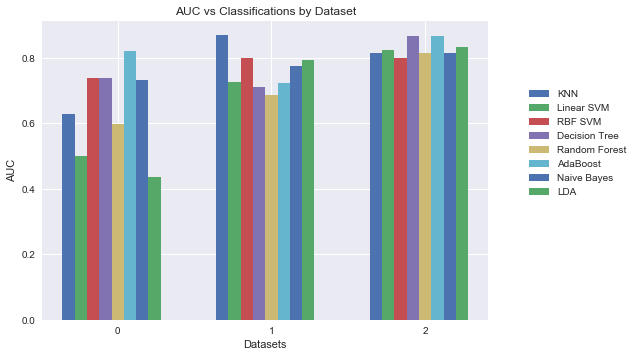

<Figure size 576x576 with 0 Axes>

In [160]:
labels = ['Dataset 1', 'Dataset2', 'Dataset 3']

KNN = df['Nearest Neighbors'].values
L_SVM = df['Linear SVM'].values
RBF_SVM = df['RBF SVM'].values
DT = df['Decision Tree'].values
RF = df['Random Forest'].values
AB = df['AdaBoost'].values
NB = df['Naive Bayes'].values
LDA = df['LDA'].values

x = np.arange(len(labels))
width = 0.08 
fig, ax = plt.subplots()
rects1 = ax.bar(x - 4*width/1, KNN, width, label = 'KNN')
rects2 = ax.bar(x - 3*width/1, L_SVM, width, label = 'Linear SVM')
rects1 = ax.bar(x - 2*width/1, RBF_SVM, width, label = 'RBF SVM')
rects2 = ax.bar(x - 1*width/1, DT, width, label = 'Decision Tree')
rects1 = ax.bar(x, RF, width, label = 'Random Forest')
rects2 = ax.bar(x + 1*width/1, AB, width, label = 'AdaBoost')
rects1 = ax.bar(x + 2*width/1, NB, width, label = 'Naive Bayes')
rects2 = ax.bar(x + 3*width/1, LDA, width, label = 'LDA')
ax.set_xlabel('Datasets')
ax.set_ylabel('AUC')
ax.set_title('AUC vs Classifications by Dataset')
ax.set_xticks(x)
ax.legend(loc='upper center', bbox_to_anchor=(1.2, 0.8), ncol=1)
fig = plt.figure(figsize = (8,8))

#### Question 2 (5 points)

a. Perform PCA on the three datasets ('dataset1.csv', 'dataset2.csv', 'dataset3.csv'), and only keep the first 2 principal components.

In [171]:
# Your code goes here

from sklearn.decomposition import PCA

def pca(data):
    X = data.drop('y', axis = 1)
    y = data['y']
    pca = PCA(n_components = 2)
    pca_model = pca.fit_transform(X)
    return X, y, pca_model

x1, y1, pca1 = pca(data1)
x2, y2, pca2 = pca(data2)
x3, y3, pca3 = pca(data3)

b. Train the classifiers defined in 1a to classify on the PCA transformed data from 2a. Perform train-test-split and compute the AUC on the test sets. 

In [182]:
# Your code goes here

def classifier2(pca_list, y, clfs_dict):
    AUC = []
    xtrain, xtest, ytrain, ytest = train_test_split(pca_list, y, test_size = 0.5)
    
    for i in clfs_dict.values():
        i.fit(xtrain,ytrain)
        ypred = i.predict(xtest)
        fpr, tpr, thresholds = metrics.roc_curve(ytest, ypred)
        auc = round(metrics.auc(fpr,tpr),4)
        AUC.append(auc)
    return AUC

pca1_AUC = classifier2(pca1, y1, clfs)
pca2_AUC = classifier2(pca2, y2, clfs)
pca3_AUC = classifier2(pca3, y2, clfs)
print(pca1_AUC)
print(pca2_AUC)
print(pca3_AUC)

[0.6659, 0.5, 0.6844, 0.6973, 0.7093, 0.6538, 0.6103, 0.4589]
[0.9237, 0.7451, 0.9237, 0.8701, 0.8782, 0.8831, 0.8604, 0.8604]
[0.5, 0.48, 0.5, 0.46, 0.46, 0.44, 0.44, 0.48]


c. Use a bar plot to visualize the results you get from 2b. The x-axis should be the three datasets. The y-axis should be the AUC. The color for the bars should be the different algorithms.

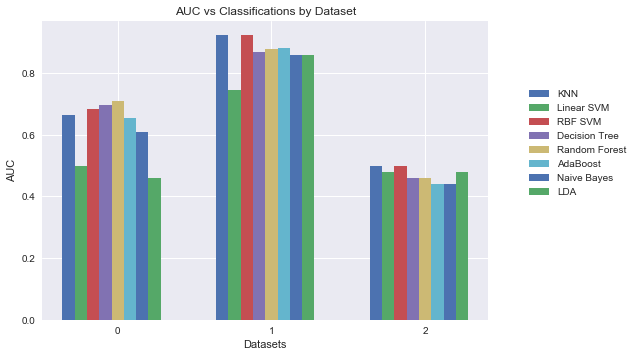

<Figure size 576x576 with 0 Axes>

In [183]:
# Your code goes here
df2 = pd.DataFrame(np.array([pca1_AUC, pca2_AUC, pca3_AUC]), columns = clfs.keys())

labels = ['Dataset 1', 'Dataset2', 'Dataset 3']

KNN = df2['Nearest Neighbors'].values
L_SVM = df2['Linear SVM'].values
RBF_SVM = df2['RBF SVM'].values
DT = df2['Decision Tree'].values
RF = df2['Random Forest'].values
AB = df2['AdaBoost'].values
NB = df2['Naive Bayes'].values
LDA = df2['LDA'].values

x = np.arange(len(labels))
width = 0.08 
fig, ax = plt.subplots()
rects1 = ax.bar(x - 4*width/1, KNN, width, label = 'KNN')
rects2 = ax.bar(x - 3*width/1, L_SVM, width, label = 'Linear SVM')
rects1 = ax.bar(x - 2*width/1, RBF_SVM, width, label = 'RBF SVM')
rects2 = ax.bar(x - 1*width/1, DT, width, label = 'Decision Tree')
rects1 = ax.bar(x, RF, width, label = 'Random Forest')
rects2 = ax.bar(x + 1*width/1, AB, width, label = 'AdaBoost')
rects1 = ax.bar(x + 2*width/1, NB, width, label = 'Naive Bayes')
rects2 = ax.bar(x + 3*width/1, LDA, width, label = 'LDA')
ax.set_xlabel('Datasets')
ax.set_ylabel('AUC')
ax.set_title('AUC vs Classifications by Dataset')
ax.set_xticks(x)
ax.legend(loc='upper center', bbox_to_anchor=(1.2, 0.8), ncol=1)
fig = plt.figure(figsize = (8,8))

d. Use the plotting function below to visualize the decision boundary of each algorithms on each dataset. The function takes 3 inputs, clf, the classifier object, X, a two-dimensional numpy array, and y, a one-dimensional numpy array.

In [193]:
def plot_decision_boundary(clf_dict, X, y):
    
    for clf in clf_dict.values():
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        # Set up plotting mesh
        # Step size of the mesh
        h = .02 
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        # Perform classification
        X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        # Plot the decision boundary. For that, we will assign a color to each

        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

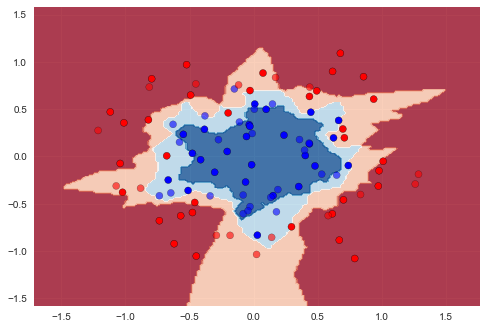

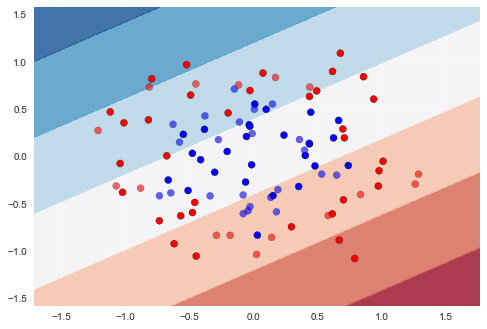

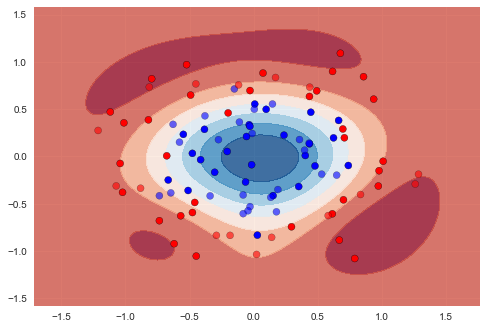

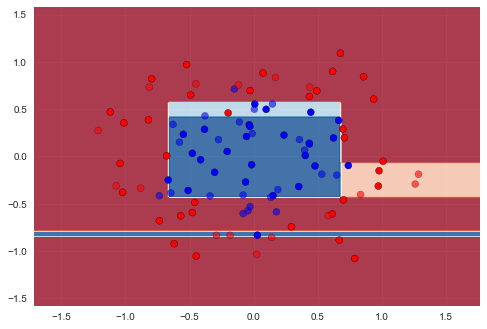

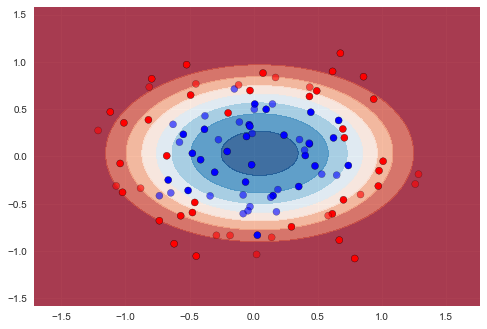

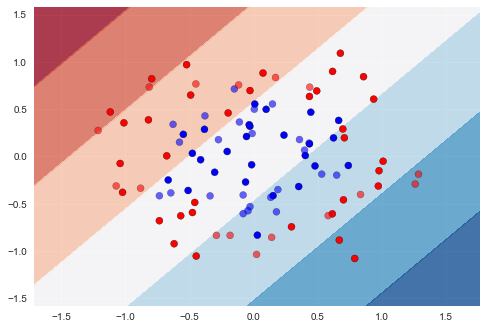

In [194]:
plot_decision_boundary(clfs, pca1, y1)

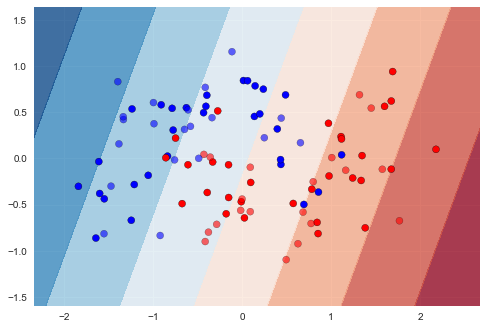

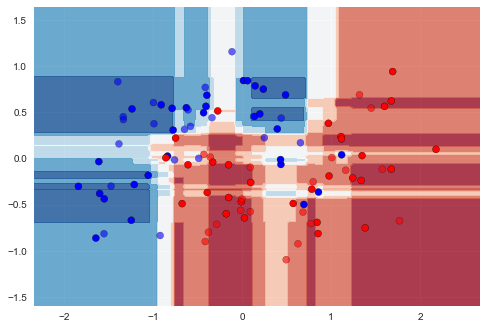

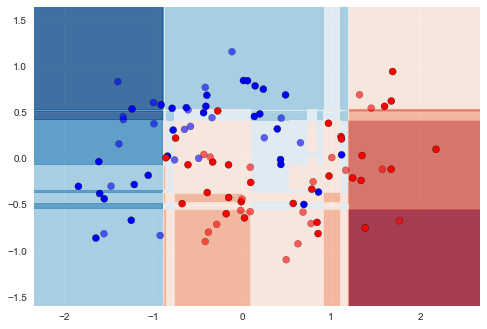

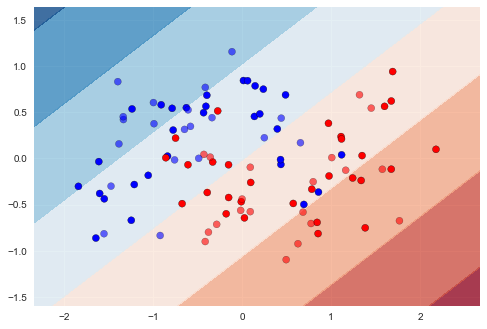

In [195]:
plot_decision_boundary(clfs, pca2, y2)

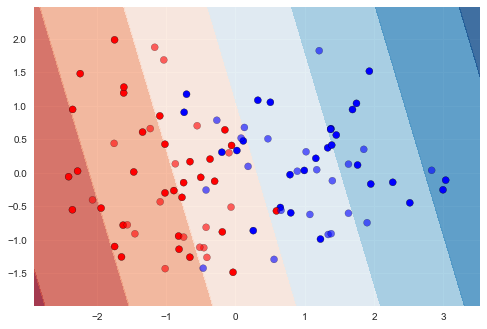

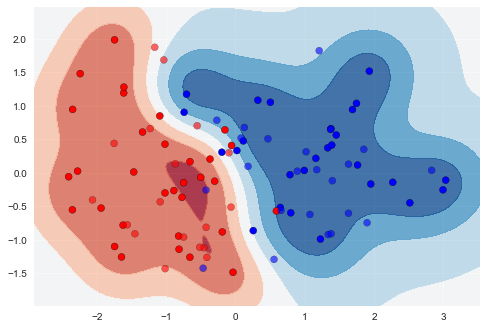

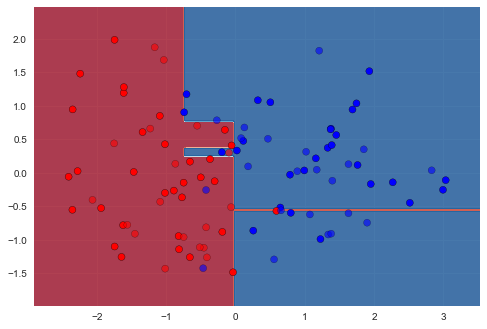

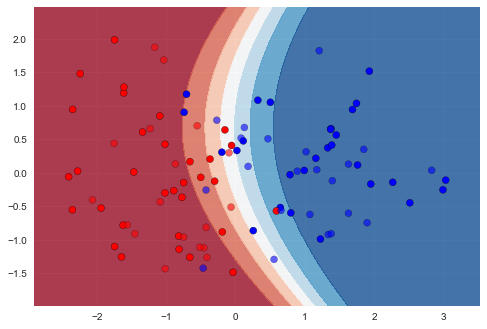

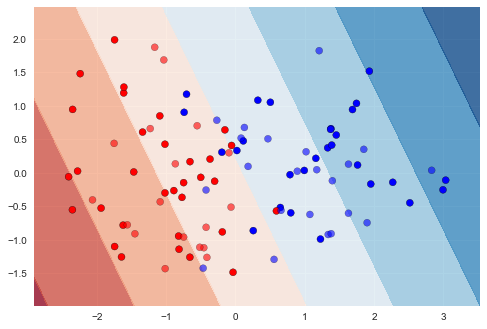

In [196]:
plot_decision_boundary(clfs, pca3, y3)